<a href="https://colab.research.google.com/github/Gaurav2912/Cronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

# **Coronavirus disease**

Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.
Most people who fall sick with COVID-19 will experience mild to moderate symptoms and recover without special treatment. However, some will become seriously ill and require medical attention.


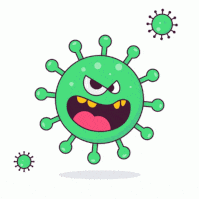

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [222]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# For displaying ploty plot in colab notebook
import plotly.io as pio
pio.renderers.default = "colab"

In [ ]:
# path of folder
path = '/content/drive/MyDrive/Colab Notebooks/capstone project/Coronavirus Tweet Sentiment Project/'

# read csv file, utf-8 code error usually comes when the range of numeric values exceeding 0 to 127
# The solution was change the encoding to latin-1
tweet_df = pd.read_csv(path + 'Coronavirus Tweets.csv' , encoding='latin-1')

In [ ]:
# showing head of dataframe
tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
# Check the dimension of data drame
tweet_df.shape

(41157, 6)

In [ ]:
num_rows = tweet_df.shape[0]
num_cols = tweet_df.shape[1]

print(f"This dataset contains {num_rows} rows and {num_cols} columns.")

This dataset contains 41157 rows and 6 columns.


----
**Confirm quickly with .info() methods the datatypes and null values in our dataframe.**

In [ ]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


# Feature Engineering

>Extract Parts of Date
* Year
* Month
* Day
* weekend

In [ ]:
def add_dateparts(df_name, col_name):
  '''Convert the data type of column TweetAt str from  datetime64, 
      and create Month column.'''

  df_name[col_name] =  pd.to_datetime(df_name[col_name])
  df_name[col_name + '_month'] = df_name[col_name].dt.month

In [ ]:
add_dateparts(tweet_df, 'TweetAt')

In [ ]:
tweet_df['length_of_tweet'] = tweet_df['OriginalTweet'].apply(len)

In [ ]:
tweet_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'TweetAt_month', 'length_of_tweet'],
      dtype='object')

In [ ]:
def add_quater(month_num):
  ''' '''
  if month_num <  4:
    return 'Q1'
  elif month_num < 7:
    return 'Q2'
  elif month_num < 10:
    return 'Q3'
  return 'Q4'

In [ ]:
tweet_df['quarter'] =  tweet_df.apply(lambda x : add_quater(x['TweetAt_month']), axis= 1)

In [ ]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   UserName         41157 non-null  int64         
 1   ScreenName       41157 non-null  int64         
 2   Location         32567 non-null  object        
 3   TweetAt          41157 non-null  datetime64[ns]
 4   OriginalTweet    41157 non-null  object        
 5   Sentiment        41157 non-null  object        
 6   TweetAt_month    41157 non-null  int64         
 7   length_of_tweet  41157 non-null  int64         
 8   quarter          41157 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 2.8+ MB


In [ ]:
# lets check the data frame
tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TweetAt_month,length_of_tweet,quarter
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,3,111,Q1
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,3,237,Q1
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,3,131,Q1
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,3,306,Q1
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3,310,Q1


In [ ]:
# checking for duplicate rows in a Dataframe
sum(tweet_df.duplicated())

0

In [ ]:
# conferming null values with diffretnt method 
tweet_df.isna().sum()

UserName              0
ScreenName            0
Location           8590
TweetAt               0
OriginalTweet         0
Sentiment             0
TweetAt_month         0
length_of_tweet       0
quarter               0
dtype: int64

In [ ]:
# Checking for unique values 
tweet_df.nunique().sort_values()

quarter                4
Sentiment              5
TweetAt_month         12
TweetAt               30
length_of_tweet      329
Location           12220
UserName           41157
ScreenName         41157
OriginalTweet      41157
dtype: int64

In [ ]:
tweet_df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserName,41157.0,24377.000000,11881.146851,3799.0,14088.0,24377.0,34666.0,44955.0
ScreenName,41157.0,69329.000000,11881.146851,48751.0,59040.0,69329.0,79618.0,89907.0
TweetAt_month,41157.0,4.333673,2.488591,1.0,3.0,3.0,5.0,12.0
length_of_tweet,41157.0,204.200160,68.655129,11.0,151.0,215.0,259.0,355.0


280 is maximum lenght

# EDA

In [240]:
# set default gridtype, fontsize and palette
sns.set_style("whitegrid")
sns.set_palette(palette = ['#4169E1', '#FF5F15', '#4CBB17'])
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] =  (8,6)

In [ ]:
fig = px.histogram(tweet_df, x= 'length_of_tweet', marginal="box", 
                   title="Tweet length")

fig.show()

In [ ]:
tweet_df.groupby('Sentiment')['length_of_tweet'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
Extremely Negative,5481.0,221.479839,59.985132,14.0,181.0,237.0,271.0,355.0
Extremely Positive,6624.0,228.237470,58.390527,19.0,192.0,241.0,275.0,338.0
Negative,9917.0,203.334174,67.117114,18.0,151.0,212.0,257.0,331.0
Neutral,7713.0,168.160897,72.648841,11.0,109.0,160.0,229.0,325.0
Positive,11422.0,207.056558,66.651587,11.0,156.0,218.0,259.0,350.0


donut plot

In [ ]:
sentiment_count = tweet_df["Sentiment"].value_counts()
sentiment_count 

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

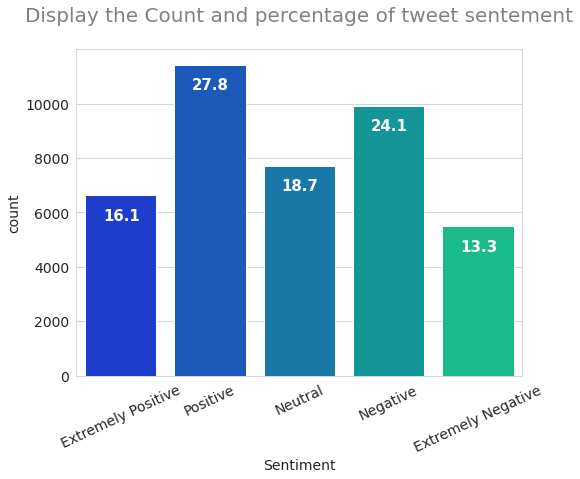

In [ ]:
#labels
labels = ['Extremely Positive', 'Positive', 'Neutral', 'Negative', 'Extremely Negative']

#values
values = [ sentiment_count.loc[label] for label in labels ]

for i, label in enumerate(labels):
  # Calculating mean charges per minutes for all type of timezone and international calls, , '#FF5959'
  value = sentiment_count.loc[label]
  percent = 100 * value / len(tweet_df)
  # To write text on each bar of the bar plot
  plt.text(x= i- 0.2, y= value - 900,
            s= round(percent,1), fontsize=15, weight='bold', color= 'white')

sns.barplot(x= labels, y = values, palette= 'winter')


plt.xlabel('Sentiment')
plt.ylabel('count')
plt.title('Display the Count and percentage of tweet sentement\n', size=20, color='grey');
plt.xticks(rotation=25);

In [119]:
tweet_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'TweetAt_month', 'length_of_tweet', 'quarter', 'ord_sent'],
      dtype='object')

In [123]:
tweet_df['OriginalTweet'].str.isspace().sum()

0

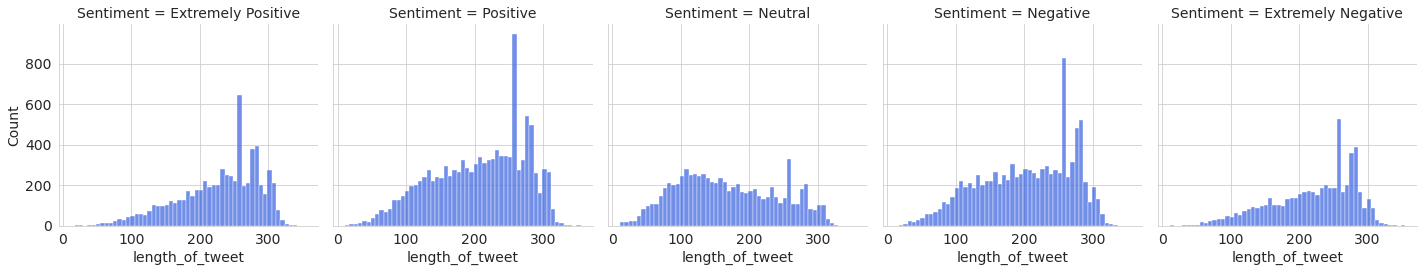

In [ ]:
sns.displot(data= tweet_df, x= 'length_of_tweet', col= 'Sentiment', col_order= labels, height= 4);

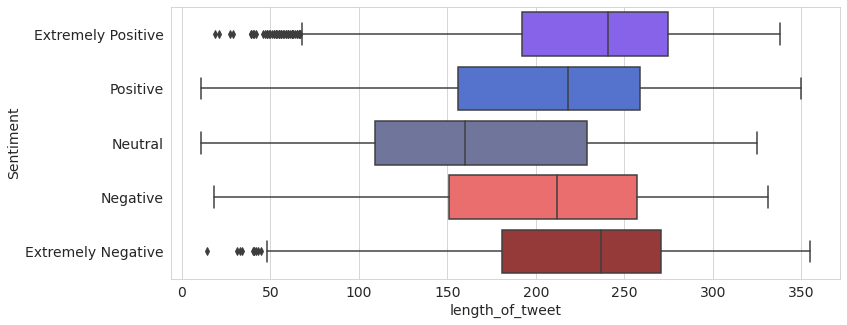

In [ ]:
plt.figure(figsize= (12,5))
palette= ['#7C4DFF','#4169E1', '#676FA3', '#FF5959', '#A52A2A']
sns.boxplot(x= 'length_of_tweet', y= 'Sentiment', data= tweet_df, order= labels, orient= 'h',palette= palette);

In [ ]:
tweet_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'TweetAt_month', 'length_of_tweet', 'quarter'],
      dtype='object')

In [ ]:
tweet_per_month = tweet_df.groupby('quarter')['UserName'].count()
tweet_per_month

quarter
Q1    27893
Q2     5352
Q3     5195
Q4     2717
Name: UserName, dtype: int64

In [ ]:
aa = 100 * tweet_df.groupby(['quarter','Sentiment'])['UserName'].count()['Q1'] / tweet_per_month.loc['Q1']
aa

Sentiment
Extremely Negative    14.039365
Extremely Positive    15.563044
Negative              24.762485
Neutral               18.162263
Positive              27.472843
Name: UserName, dtype: float64

In [ ]:
aa.loc['Negative']

24.762485211343346

In [ ]:
monthwise_sentiment = {}

for Q in ['Q1', 'Q2', 'Q3', 'Q4']:
  senti_month = tweet_df.groupby(['quarter','Sentiment'])['UserName'].count()[Q]

  senti_dist = 100 * senti_month / tweet_per_month.loc[Q]

  monthwise_sentiment[Q] = senti_dist

In [ ]:
monthwise_sentiment

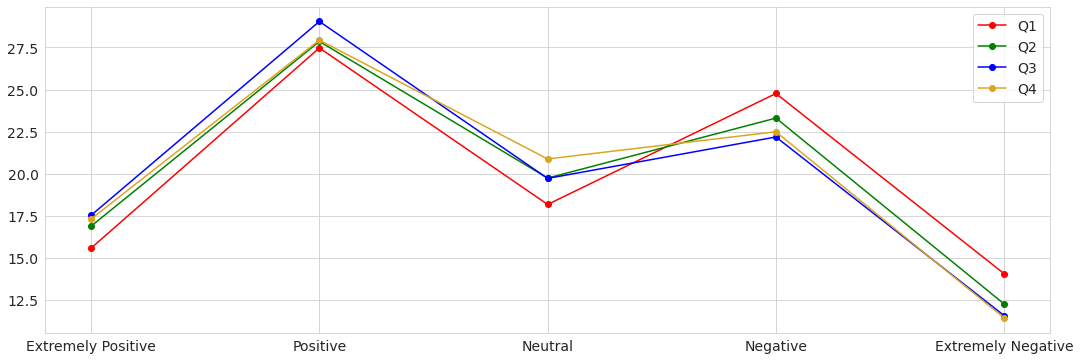

In [ ]:
plt.figure(figsize= (18,6))

col = ['#FF0000', '#008000', '#0000FF', '#DAA520']

i = 0
for month, ser in monthwise_sentiment.items():

  vals = [ ser.loc[i] for i in labels ]
  plt.plot(labels, vals, c= col[i], marker= 'o', label = month)
  i += 1

plt.legend(loc ="upper right");

# correlation check

In [ ]:
tweet_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'TweetAt_month', 'length_of_tweet', 'quarter'],
      dtype='object')

In [ ]:
df_objs = tweet_df[['Sentiment', 'quarter']]
df_objs = pd.get_dummies(df_objs)

In [ ]:
df_final = pd.concat([df_objs, tweet_df['length_of_tweet']], axis= 1)

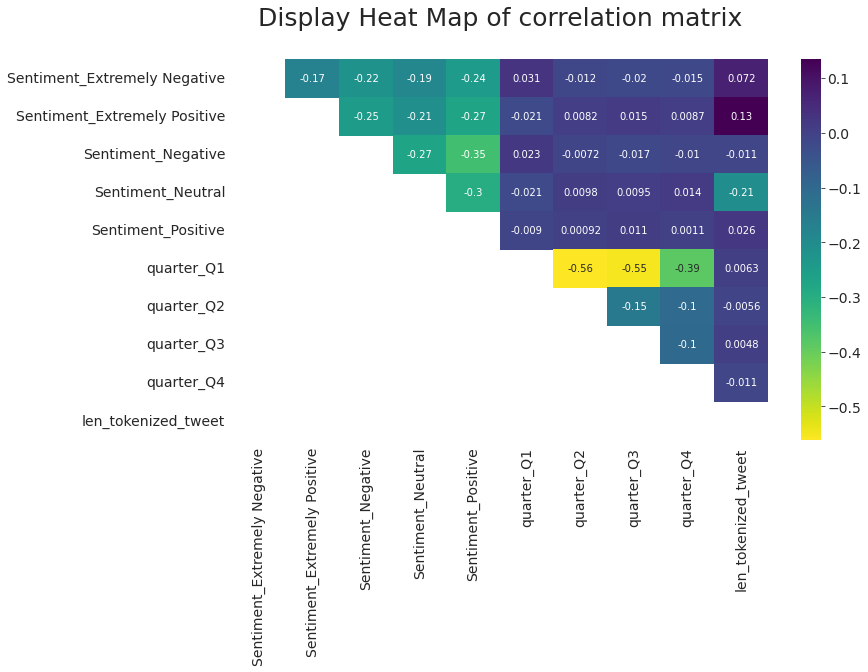

In [269]:
# for finding correlation matrix , using .corr() method
corr_df = df_final.corr()

plt.figure(figsize= (12,7))

# creating mask for lower triangular matrix
mask = np.tril(np.ones_like(corr_df))

# plotting heat map of correlation matrix
sns.heatmap(corr_df, annot= True, cmap= 'viridis_r', annot_kws={"size":10}, mask= mask)
# add title
plt.title("Display Heat Map of correlation matrix\n", fontsize= 25);

Punctuation
----
Punctuation is the use of spacing, conventional signs, and certain typographical devices as aids to the understanding and correct reading of written text, whether read silently or aloud.

We can use **CountVectorizer** and **tfidf vectorizer** of the scikit-learn library. It by default remove punctuation and lower the documents. It turns each vector into the sparse matrix. It will make sure the word present in the vocabulary and if present it prints the number of occurrences of the word in the vocabulary.

In [150]:
def text_process(msg):
    eng_stop_words = stopwords.words('english')
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [209]:
tweet_df['tokenized_tweet'] = tweet_df['OriginalTweet'].apply(text_process)

In [254]:
# Define helper functions
def top_n_words(cv_model, text_data, n_words, plot= False, palette= None):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    matrix = cv_model.fit_transform(text_data)
    freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
    # sort from largest to smallest
    # Top  20 words used in twittws
    tups_of_word = (sorted(freqs, key=lambda x: -x[1])[:n_words])  # -x[1] , negative order

    dict_of_words =   dict(tups_of_word)

    top_words= list(dict_of_words.keys())
    top_values= list(dict_of_words.values())
    
    if plot:
      plt.figure(figsize= (10,6))
      sns.barplot(x= list(dict_of_words.keys()), y = list(dict_of_words.values()), palette= palette)
      plt.ylabel('count')
      plt.title(f"Top {n_words} words")
      plt.xticks(rotation=90);

    else: 
      return top_words, top_values

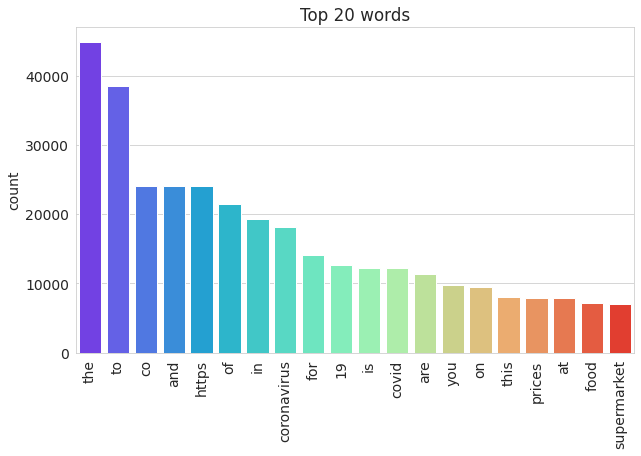

In [256]:
cv = CountVectorizer()

top_n_words(cv, tweet_df['OriginalTweet'], 20, True, 'rainbow')

StopWord
---
Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so commonly used that they carry very little useful information.

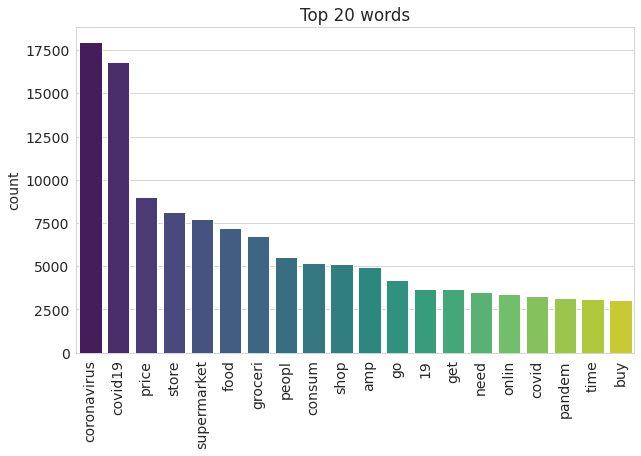

In [257]:
top_n_words(cv, tweet_df['tokenized_tweet'], 20, True,'viridis')

**Stemming operations**

Stemming operation bundles together words of same root. e.g. stem operation bundles "response" and "respond" into a common "respon"

In [223]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [224]:
tweet_df['tokenized_tweet'] = tweet_df['tokenized_tweet'].apply(stemming)

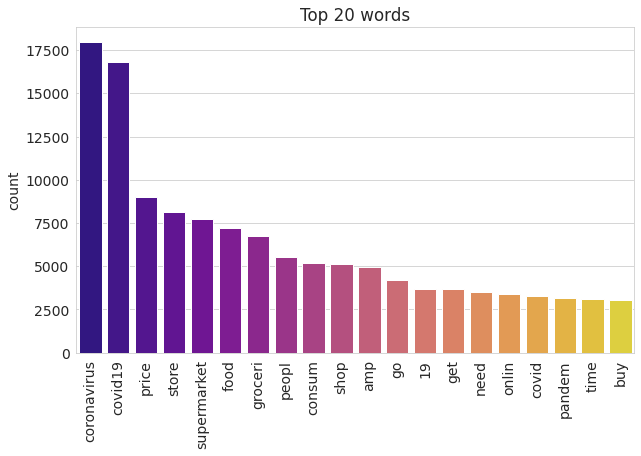

In [258]:
top_n_words(cv, tweet_df['tokenized_tweet'], 20, True,'plasma')

In [214]:
tweet_df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [259]:
tweet_df['len_tokenized_tweet'] = tweet_df['tokenized_tweet'].apply(len)

In [218]:
# plt.figure(figsize= (10,6))

# ext_pos_df = tweet_df['tokenized_tweet'][tweet_df['Sentiment'] == 'Extremely Positive']

# plot_top_n_words(cv, ext_pos_df, 20, 'viridis');

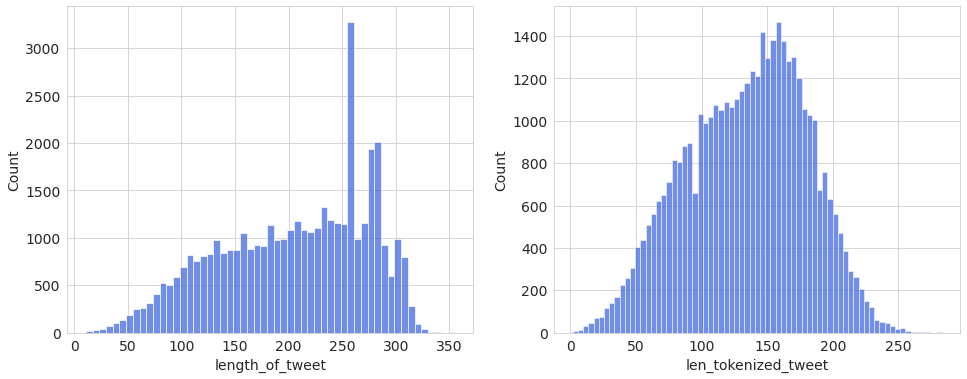

In [267]:
fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize= (16,6))

sns.histplot(data= tweet_df, x= 'length_of_tweet', ax= ax[0])
sns.histplot(data= tweet_df, x= 'len_tokenized_tweet', ax= ax[1]);

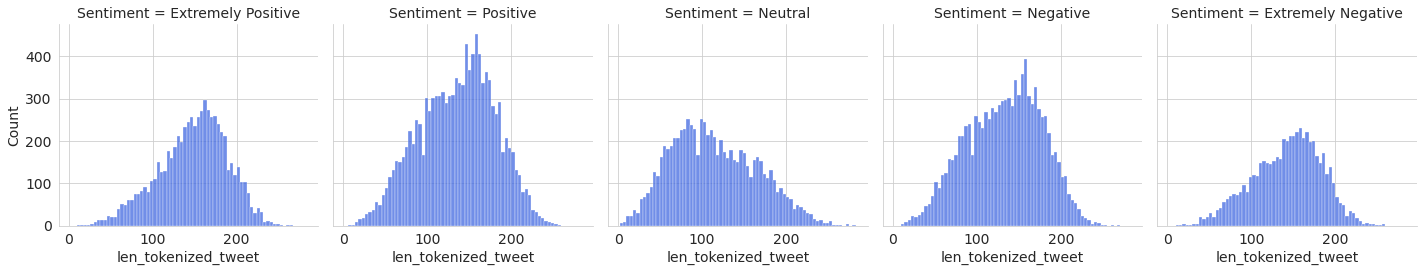

In [260]:
sns.displot(data= tweet_df, x= 'len_tokenized_tweet', col= 'Sentiment', col_order= labels, height= 4);

# Model